In [58]:
%matplotlib inline

In [70]:
import tensorflow as tf
from keras.datasets import mnist
from matplotlib import pyplot as plt

In [119]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [69]:
# Définir la fonction sigmoïde
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Définir la fonction d'erreur
def error(y_true, y_pred):
  return tf.math.reduce_sum(tf.math.square(y_true-y_pred))

In [118]:
def appr(x_train,y_train,epochs=10,alpha=0.01):

    # Initialiser les poids du réseau de neurones aléatoirement
    W = tf.Variable(tf.random.normal((28*28,1)))

    # Boucle principale sur les époques
    for epoch in range(epochs):

        # Mélanger le jeu d'entraînement
        indices = tf.range(len(x_train))
        indices = tf.random.shuffle(indices)
        x_train = tf.gather(x_train, indices)
        y_train = tf.gather(y_train, indices)

        # Initialiser l'erreur cumulée
        cum_error = 0

        # Boucle sur les données d'entraînement
        for x, y in zip(x_train, y_train):

            # Convertir l'image en vecteur de réels normalisés
            x = tf.reshape(x, (28*28)) / 255

            # Convertir l'étiquette en vecteur binaire d'une dimension 
            y = tf.one_hot(y, depth=1)

            # Créer un gradient tape pour enregistrer les opérations
            with tf.GradientTape() as tape:

                # Calculer la sortie du réseau de neurones
                z = sigmoid(tf.tensordot(x, W, axes=1))

                # Calculer l'erreur locale
                e = error(y, z)

            # Mettre à jour l'erreur cumulée
            cum_error += e

            # Calculer le gradient de l'erreur par rapport aux poids
            grad_W = tape.gradient(e, W)

            # Mettre à jour les poids du réseau de neurones
            W.assign_sub(alpha * grad_W)
    
    pass


In [120]:
appr(x_train[:100],y_train[:100])

il faudrait faire une df avec x_train pour facilement check certaines valeurs

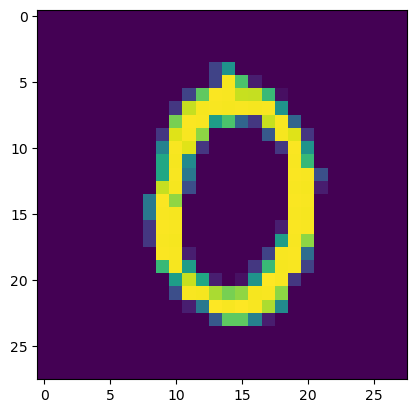

In [68]:
plt.imshow(tf.reshape(x_test[157], (28,28))/255)

In [125]:
TEST=[]
for i in range(5000):
    if sigmoid(tf.tensordot(tf.reshape(x_test[i], (28*28))/255 , W, axes=1))>0.9:
        #print(i)
        TEST.append(y_test[i])

In [129]:
import pandas as pd

In [138]:
t = pd.Series(TEST)

In [147]:
t.value_counts()

4    228
7    175
0    109
2     77
6     69
8     64
9     46
5     40
3     31
1      9
dtype: int64

In [62]:
for i in range(200):
    if y_test[i]==0:
        print(i)
        print(sigmoid(tf.tensordot(tf.reshape(x_test[i], (28*28))/255 , W, axes=1)))


3
tf.Tensor([0.72039115], shape=(1,), dtype=float32)
10
tf.Tensor([0.01486775], shape=(1,), dtype=float32)
13
tf.Tensor([0.00235136], shape=(1,), dtype=float32)
25
tf.Tensor([1.6815387e-05], shape=(1,), dtype=float32)
28
tf.Tensor([0.9508319], shape=(1,), dtype=float32)
55
tf.Tensor([0.6809704], shape=(1,), dtype=float32)
69
tf.Tensor([0.00019051], shape=(1,), dtype=float32)
71
tf.Tensor([0.00013999], shape=(1,), dtype=float32)
101
tf.Tensor([0.04381334], shape=(1,), dtype=float32)
126
tf.Tensor([0.9965335], shape=(1,), dtype=float32)
136
tf.Tensor([0.98752755], shape=(1,), dtype=float32)
148
tf.Tensor([0.26931936], shape=(1,), dtype=float32)
157
tf.Tensor([0.992987], shape=(1,), dtype=float32)
183
tf.Tensor([0.00025026], shape=(1,), dtype=float32)
188
tf.Tensor([0.586616], shape=(1,), dtype=float32)
192
tf.Tensor([0.7027405], shape=(1,), dtype=float32)
194
tf.Tensor([0.59666127], shape=(1,), dtype=float32)


In [38]:
x = tf.reshape(x_train[24], (28*28))/255

In [39]:
sigmoid(tf.tensordot(x , W, axes=1))

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9793758], dtype=float32)>

In [113]:
from PIL import Image
import numpy as np

In [114]:
chiffre = Image.open("chiffre.png")

#inverser les couleurs (on a entrainé notre réseau sur des chiffres blancs sur fond noir)
chiffre = 255 - np.asarray(chiffre) 

#on ne garde qu'une des 3 couleurs
chiffre = chiffre[:,:,0] 

#on créé le vecteur et on normalise
chiffre = tf.reshape(tf.Variable(chiffre), (28*28))/255

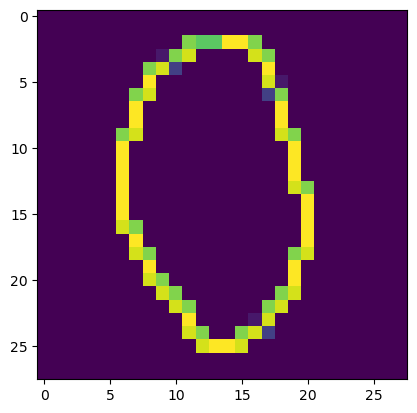

In [116]:
plt.imshow(tf.reshape(chiffre, (28,28))/255)

In [110]:
sigmoid(tf.tensordot(chiffre , W, axes=1))

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.4220643], dtype=float32)>

Mon chiffe tracé à la main est reconnu comme un 0 à 42%. <br>
On pourrait essayer d'entraîner le réseau de neurones sur une plus grosse partie du dataset ou augmenter le nombre d'époques lors de la phase d'entraînement

on inverse à nouveau

In [104]:
chiffre=1-chiffre

In [105]:
sigmoid(tf.tensordot(chiffre , W, axes=1))

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([3.0106656e-23], dtype=float32)>

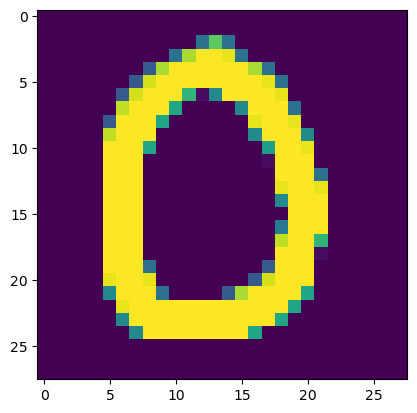

In [108]:
plt.imshow(tf.reshape(1-chiffre, (28,28))/255)